In [192]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import time

In [222]:
from olsmax import OLSMax
from ridgemax import RidgeMax
from sklearn.linear_model import Ridge


# Metric functions

In [223]:
def mean_squared_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Compute MSE (averaged over all targets)."""
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Compute the R^2 for each target and return the average R^2.
    """
    r2_targets = []
    for j in range(y_true.shape[1]):
        ss_res = np.sum((y_true[:, j] - y_pred[:, j]) ** 2)
        ss_tot = np.sum((y_true[:, j] - np.mean(y_true[:, j])) ** 2)
        r2_targets.append(1 - ss_res / ss_tot)
    return np.mean(r2_targets)

# Auto-MPG dataset

In [224]:
mpg = sns.load_dataset("mpg").drop(columns=["origin", "name"]).dropna()
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


Text(0.5, 1.0, 'Corrmat')

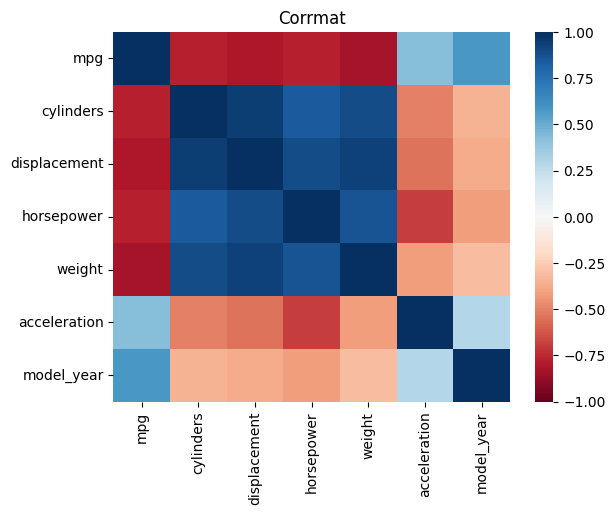

In [225]:
sns.heatmap(mpg.corr(), cmap='RdBu', vmin=-1, vmax=1)
plt.title("Corrmat")

In [226]:
features = ["cylinders", "displacement", "weight", "model_year", "acceleration"]
targets = ["mpg", "horsepower"]

In [227]:
X = mpg[features].values.astype(float)
y = mpg[targets].values.astype(float)

In [228]:
n_iter = 10000
ridge_custom_mse_list = []
ols_mse_list = []
sklearn_mse_list = []

ridge_custom_r2_list = []
ols_r2_list = []
sklearn_r2_list = []

ridge_custom_time_list = []
ols_time_list = []
sklearn_time_list = []

np.random.seed(42)
n_samples = X.shape[0]

In [229]:
for i in range(n_iter):
    # Generate a random permutation and split the data (80% training, 20% test)
    indices = np.random.permutation(n_samples)
    split_index = int(0.8 * n_samples)
    train_idx = indices[:split_index]
    test_idx = indices[split_index:]
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # standardize features based on training set statistics
    X_train_mean = X_train.mean(axis=0)
    X_train_std = X_train.std(axis=0)
    X_train_scaled = (X_train - X_train_mean) / X_train_std
    X_test_scaled = (X_test - X_train_mean) / X_train_std
    
    # --- Model 1: Custom Ridge (RidgeMax) ---
    start = time.perf_counter()
    ridge_custom_model = RidgeMax(alpha=1.0, fit_intercept=True)
    ridge_custom_model.fit(X_train_scaled, y_train)
    fit_time = time.perf_counter() - start
    ridge_custom_time_list.append(fit_time)
    y_test_pred_ridge_custom = ridge_custom_model.predict(X_test_scaled)
    
    # --- Model 2: OLSMax using SVD ---
    start = time.perf_counter()
    ols_model = OLSMax(fit_intercept=True)
    ols_model.fit(X_train_scaled, y_train, method="svd")
    fit_time = time.perf_counter() - start
    ols_time_list.append(fit_time)
    y_test_pred_ols = ols_model.predict(X_test_scaled)
    
    # --- Model 3: Scikit-learn's Ridge ---
    start = time.perf_counter()
    sklearn_ridge_model = Ridge(alpha=1.0, fit_intercept=True)
    sklearn_ridge_model.fit(X_train_scaled, y_train)
    fit_time = time.perf_counter() - start
    sklearn_time_list.append(fit_time)
    y_test_pred_sklearn = sklearn_ridge_model.predict(X_test_scaled)
    
    # metrics 
    mse_ridge_custom = mean_squared_error(y_test, y_test_pred_ridge_custom)
    mse_ols = mean_squared_error(y_test, y_test_pred_ols)
    mse_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)
    
    r2_ridge_custom = r2_score(y_test, y_test_pred_ridge_custom)
    r2_ols = r2_score(y_test, y_test_pred_ols)
    r2_sklearn = r2_score(y_test, y_test_pred_sklearn)
    
    
    ridge_custom_mse_list.append(mse_ridge_custom)
    ols_mse_list.append(mse_ols)
    sklearn_mse_list.append(mse_sklearn)
    
    ridge_custom_r2_list.append(r2_ridge_custom)
    ols_r2_list.append(r2_ols)
    sklearn_r2_list.append(r2_sklearn)

INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Model fitted successfully.
INFO: Mode

In [230]:
# mean and standard deviation of the test metrics
ridge_custom_mse_mean = np.mean(ridge_custom_mse_list)
ridge_custom_mse_std = np.std(ridge_custom_mse_list)
ols_mse_mean = np.mean(ols_mse_list)
ols_mse_std = np.std(ols_mse_list)
sklearn_mse_mean = np.mean(sklearn_mse_list)
sklearn_mse_std = np.std(sklearn_mse_list)

ridge_custom_r2_mean = np.mean(ridge_custom_r2_list)
ridge_custom_r2_std = np.std(ridge_custom_r2_list)
ols_r2_mean = np.mean(ols_r2_list)
ols_r2_std = np.std(ols_r2_list)
sklearn_r2_mean = np.mean(sklearn_r2_list)
sklearn_r2_std = np.std(sklearn_r2_list)

# average training times
ridge_custom_time_mean = np.mean(ridge_custom_time_list)
ridge_custom_time_std = np.std(ridge_custom_time_list)
ols_time_mean = np.mean(ols_time_list)
ols_time_std = np.std(ols_time_list)
sklearn_time_mean = np.mean(sklearn_time_list)
sklearn_time_std = np.std(sklearn_time_list)

print(f"Performance Metrics Comparison (over {n_iter} splits):\n")
print("Custom RidgeMax:")
print(f"  Test MSE:  {ridge_custom_mse_mean:.4f} ± {ridge_custom_mse_std:.4f}")
print(f"  Test R²:   {ridge_custom_r2_mean:.4f} ± {ridge_custom_r2_std:.4f}")
print(f"  Fit Time:  {ridge_custom_time_mean*1000:.2f} ms ± {ridge_custom_time_std*1000:.2f} ms\n")
print("OLSMax (SVD):")
print(f"  Test MSE:  {ols_mse_mean:.4f} ± {ols_mse_std:.4f}")
print(f"  Test R²:   {ols_r2_mean:.4f} ± {ols_r2_std:.4f}")
print(f"  Fit Time:  {ols_time_mean*1000:.2f} ms ± {ols_time_std*1000:.2f} ms\n")
print("Sklearn Ridge:")
print(f"  Test MSE:  {sklearn_mse_mean:.4f} ± {sklearn_mse_std:.4f}")
print(f"  Test R²:   {sklearn_r2_mean:.4f} ± {sklearn_r2_std:.4f}")
print(f"  Fit Time:  {sklearn_time_mean*1000:.2f} ms ± {sklearn_time_std*1000:.2f} ms\n")

Performance Metrics Comparison (over 10000 splits):

Custom RidgeMax:
  Test MSE:  89.5411 ± 20.5521
  Test R²:   0.8424 ± 0.0195
  Fit Time:  1.77 ms ± 6.36 ms

OLSMax (SVD):
  Test MSE:  89.7479 ± 20.6739
  Test R²:   0.8422 ± 0.0197
  Fit Time:  0.36 ms ± 0.26 ms

Sklearn Ridge:
  Test MSE:  89.5411 ± 20.5521
  Test R²:   0.8424 ± 0.0195
  Fit Time:  1.78 ms ± 0.78 ms



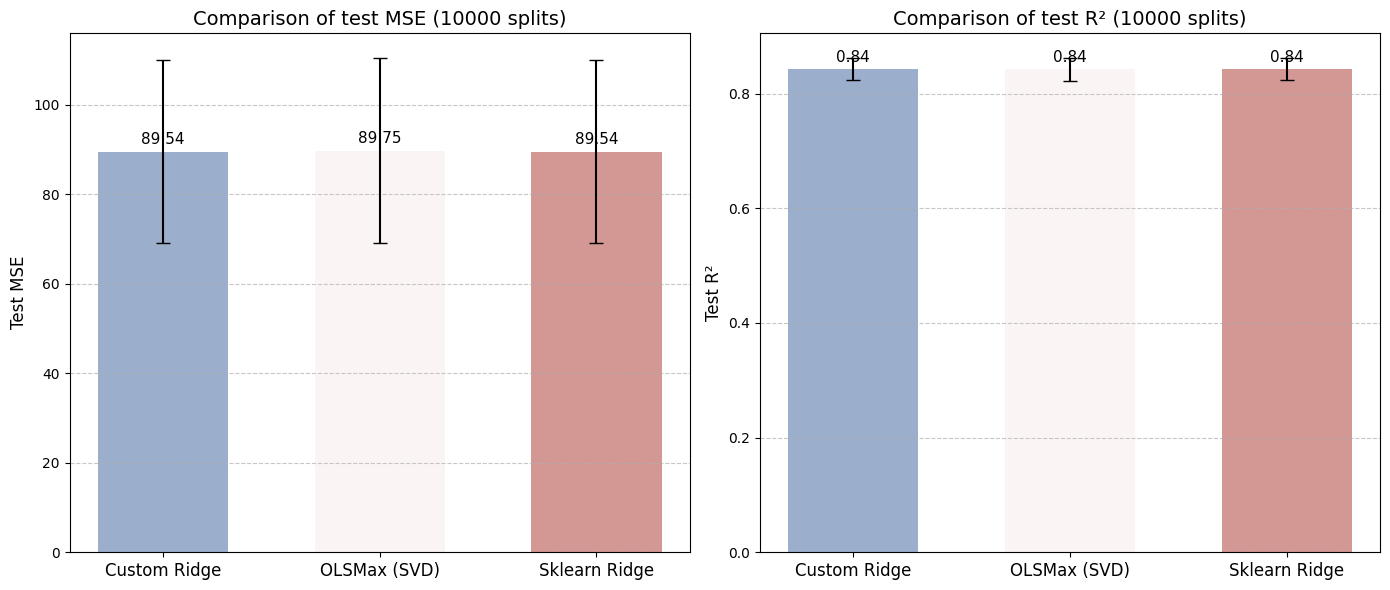

In [231]:
# --- Bar Plots with Error Bars ---

models = ['Custom Ridge', 'OLSMax (SVD)', 'Sklearn Ridge']
colors = sns.color_palette("vlag", n_colors=len(models))

mse_means = [ridge_custom_mse_mean, ols_mse_mean, sklearn_mse_mean]
mse_stds = [ridge_custom_mse_std, ols_mse_std, sklearn_mse_std]
r2_means = [ridge_custom_r2_mean, ols_r2_mean, sklearn_r2_mean]
r2_stds = [ridge_custom_r2_std, ols_r2_std, sklearn_r2_std]

x = np.arange(len(models))
width = 0.6

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- Bar plot for Test MSE ---
bars0 = ax[0].bar(x, mse_means, yerr=mse_stds, capsize=5, width=width, color=colors)
ax[0].set_xticks(x)
ax[0].set_xticklabels(models, fontsize=12)
ax[0].set_ylabel("Test MSE", fontsize=12)
ax[0].set_title(f"Comparison of test MSE ({n_iter} splits)", fontsize=14)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

for rect in bars0:
    height = rect.get_height()
    ax[0].annotate(f'{height:.2f}',
                   xy=(rect.get_x() + rect.get_width()/2, height),
                   xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom', fontsize=11)

# --- Bar plot for Test R² ---
bars1 = ax[1].bar(x, r2_means, yerr=r2_stds, capsize=5, width=width, color=colors)
ax[1].set_xticks(x)
ax[1].set_xticklabels(models, fontsize=12)
ax[1].set_ylabel("Test R²", fontsize=12)
ax[1].set_title(f"Comparison of test R² ({n_iter} splits)", fontsize=14)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

for rect in bars1:
    height = rect.get_height()
    ax[1].annotate(f'{height:.2f}',
                   xy=(rect.get_x() + rect.get_width()/2, height),
                   xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

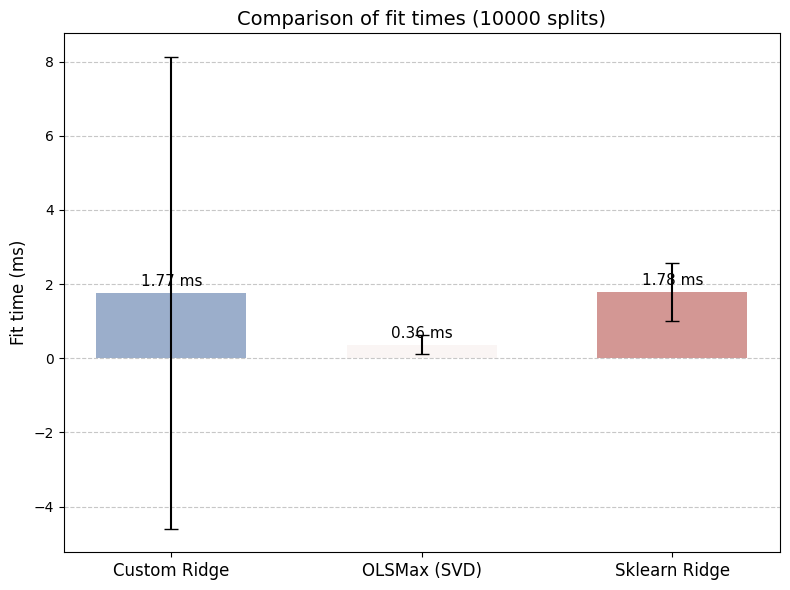

In [232]:
# --- Bar plot for average fit times ---

fit_time_means = [ridge_custom_time_mean*1000, ols_time_mean*1000, sklearn_time_mean*1000]
fit_time_stds = [ridge_custom_time_std*1000, ols_time_std*1000, sklearn_time_std*1000]

fig2, ax2 = plt.subplots(figsize=(8,6))
bars2 = ax2.bar(x, fit_time_means, yerr=fit_time_stds, capsize=5, width=width, color=colors)
ax2.set_xticks(x)
ax2.set_xticklabels(models, fontsize=12)
ax2.set_ylabel("Fit time (ms)", fontsize=12)
ax2.set_title(f"Comparison of fit times ({n_iter} splits)", fontsize=14)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

for rect in bars2:
    height = rect.get_height()
    ax2.annotate(f'{height:.2f} ms',
                 xy=(rect.get_x() + rect.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

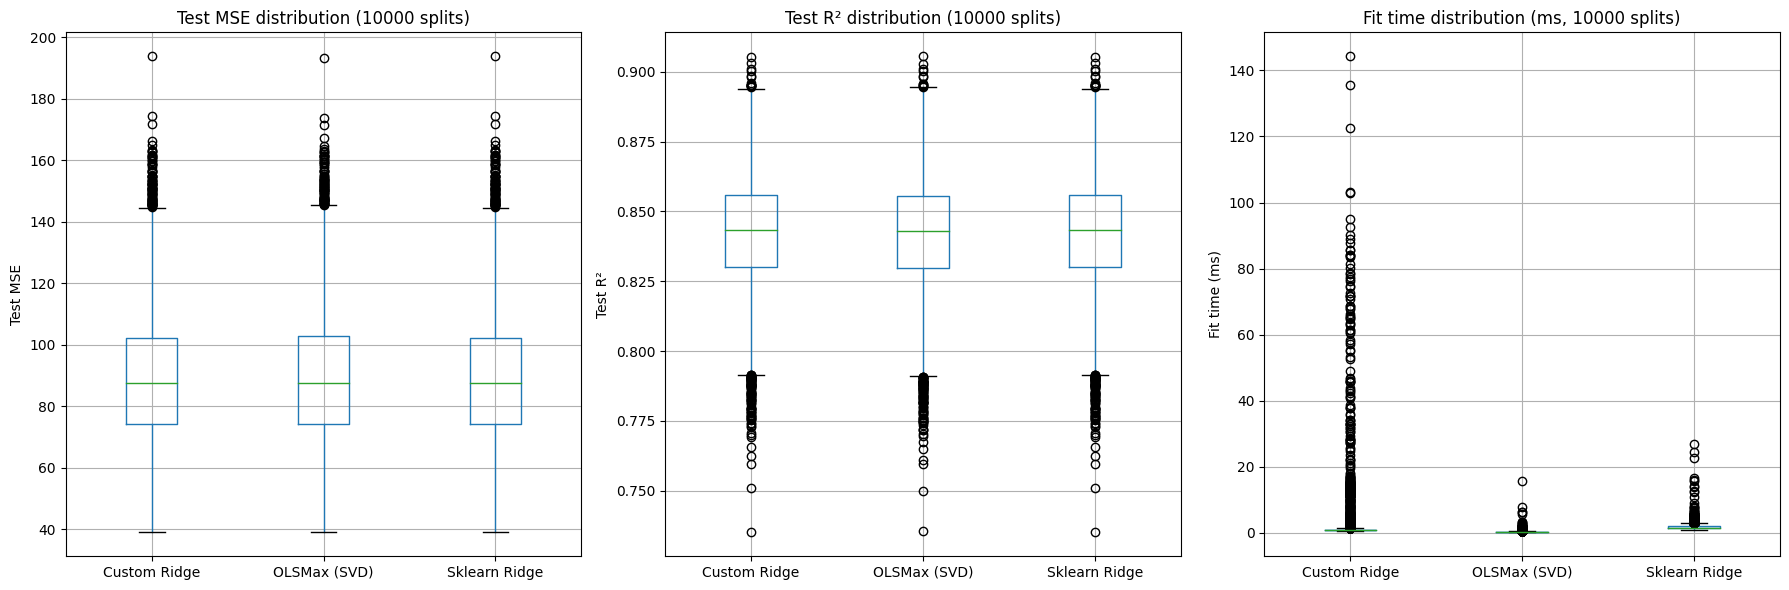

In [233]:
# --- Box plots for the distributions of metrics and fit times ---
df_mse = pd.DataFrame({
    'Custom Ridge': ridge_custom_mse_list,
    'OLSMax (SVD)': ols_mse_list,
    'Sklearn Ridge': sklearn_mse_list,
})
df_r2 = pd.DataFrame({
    'Custom Ridge': ridge_custom_r2_list,
    'OLSMax (SVD)': ols_r2_list,
    'Sklearn Ridge': sklearn_r2_list,
})
df_time = pd.DataFrame({
    'Custom Ridge': ridge_custom_time_list,
    'OLSMax (SVD)': ols_time_list,
    'Sklearn Ridge': sklearn_time_list,
}) * 1000  # convert seconds to milliseconds

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
df_mse.boxplot(ax=axes[0])
axes[0].set_title(f"Test MSE distribution ({n_iter} splits)")
axes[0].set_ylabel("Test MSE")
df_r2.boxplot(ax=axes[1])
axes[1].set_title(f"Test R² distribution ({n_iter} splits)")
axes[1].set_ylabel("Test R²")
df_time.boxplot(ax=axes[2])
axes[2].set_title(f"Fit time distribution (ms, {n_iter} splits)")
axes[2].set_ylabel("Fit time (ms)")
plt.tight_layout()
plt.show()

- RidgeMax gives similar results (MSE/R²) to the built-in method
- Yet, its time performance is subject to huge variability
  